In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfs=pd.read_csv(r"https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")

In [4]:
dfs.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [5]:
dfs.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [6]:
dfs['diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [7]:
dfs['diagnosis'].value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

In [8]:
x=dfs.drop(columns=["id","diagnosis"])
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
1,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
2,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
3,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
4,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,16.160,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619
394,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
395,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
396,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865


In [9]:
y=dfs["diagnosis"]

In [10]:
y

0      B
1      B
2      B
3      B
4      M
      ..
393    M
394    M
395    M
396    B
397    M
Name: diagnosis, Length: 398, dtype: object

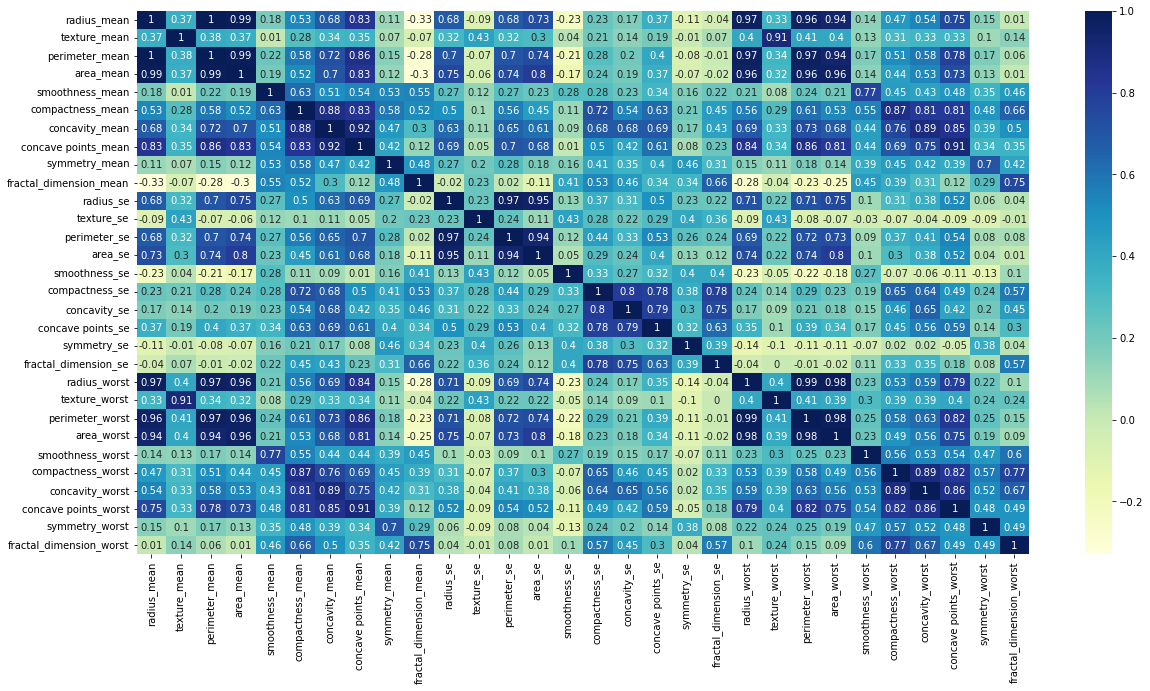

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

In [12]:
 cor_matrix = x.corr().abs()
print(cor_matrix)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.370559        0.997984   0.986661   
texture_mean                0.370559      1.000000        0.377602   0.371092   
perimeter_mean              0.997984      0.377602        1.000000   0.986029   
area_mean                   0.986661      0.371092        0.986029   1.000000   
smoothness_mean             0.181021      0.009188        0.215509   0.185633   
compactness_mean            0.531935      0.283013        0.580307   0.524159   
concavity_mean              0.684128      0.343909        0.720764   0.696779   
concave points_mean         0.833289      0.347076        0.859523   0.834096   
symmetry_mean               0.110827      0.074819        0.145323   0.115726   
fractal_dimension_mean      0.331993      0.071212        0.284797   0.303085   
radius_se                   0.684046      0.317878        0.696138   0.746399   
texture_se                  

In [13]:

    x2 = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    x2 = pd.DataFrame(x2,columns=x.columns)
    x2

C:\Users\91729\AppData\Local\Temp\ipykernel_5304\388355485.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x2 = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.370559,0.997984,0.986661,0.181021,0.531935,0.684128,0.833289,0.110827,0.331993,...,0.969835,0.329921,0.964768,0.939238,0.140573,0.466587,0.541233,0.754886,0.148066,0.014259
texture_mean,NaN,NaN,0.377602,0.371092,0.009188,0.283013,0.343909,0.347076,0.074819,0.071212,...,0.402402,0.909448,0.410636,0.400265,0.131954,0.306401,0.329708,0.333799,0.095071,0.135850
perimeter_mean,NaN,NaN,NaN,0.986029,0.215509,0.580307,0.720764,0.859523,0.145323,0.284797,...,0.969895,0.337438,0.969863,0.939864,0.168529,0.505573,0.575270,0.779149,0.172585,0.055418
area_mean,NaN,NaN,NaN,NaN,0.185633,0.524159,0.696779,0.834096,0.115726,0.303085,...,0.962820,0.320911,0.958728,0.958249,0.141403,0.443660,0.528460,0.731554,0.127453,0.011020
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.633941,0.507177,0.536495,0.532225,0.546585,...,0.213582,0.080926,0.238416,0.206867,0.774433,0.450434,0.426570,0.481344,0.354264,0.457513
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.877536,0.832109,0.581543,0.515431,...,0.559828,0.292928,0.613184,0.533080,0.545285,0.866952,0.810001,0.808524,0.481947,0.659135
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916765,0.474787,0.303101,...,0.691384,0.333262,0.730322,0.681134,0.440080,0.762450,0.885576,0.853648,0.388345,0.498175
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.416276,0.123031,...,0.835211,0.337172,0.859342,0.814219,0.441862,0.687621,0.752165,0.905909,0.341613,0.347100
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476693,...,0.146293,0.107975,0.179625,0.140769,0.385940,0.449289,0.418030,0.385992,0.695937,0.423496
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277611,0.038969,0.230473,0.253906,0.454680,0.385923,0.308948,0.122790,0.287200,0.745667


In [14]:
to_drop = [column for column in x2.columns if any(x2[column] > 0.95)]
print(); print(to_drop)


['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [15]:
x=x.drop(columns=['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'])
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.160,20.54,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.4730,...,0.005564,0.02086,0.002701,28.46,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
1,11.750,17.56,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.9070,...,0.013160,0.01835,0.002318,27.98,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
2,10.650,25.22,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,...,0.006245,0.02158,0.002619,35.19,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
3,12.000,28.23,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.7050,...,0.009166,0.01745,0.004302,37.88,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
4,16.130,20.68,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,...,0.012970,0.01689,0.004142,31.48,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,16.160,21.54,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,0.4332,1.2650,...,0.009231,0.01535,0.002373,31.68,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619
394,23.270,22.04,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,0.6642,0.8561,...,0.016230,0.01956,0.003740,28.22,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
395,16.020,23.24,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,...,0.007591,0.01460,0.003042,33.88,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
396,8.734,16.84,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,0.5169,2.0790,...,0.000000,0.01865,0.006736,22.80,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865


In [16]:
y = {k: v for k, v in zip(['B', 'M'], list(range(2)))}
y

{'B': 0, 'M': 1}

In [17]:
for i in range(dfs.shape[0]):
    dfs.iloc[i, -1] = y[dfs.iloc[i, -1]]

dfs

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.160,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,0
1,91858,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,0
2,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,0
3,9111843,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,0
4,84862001,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86730502,16.160,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,...,31.68,129.70,1175.0,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619,1
394,8712289,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,1
395,845636,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452,1
396,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865,0


In [18]:
y = np.asarray(dfs.iloc[:, -1]).astype('int64')

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
x_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
64,11.62,18.18,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,0.4101,1.7400,...,0.018410,0.01807,0.005217,25.40,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270
55,19.55,28.77,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,0.8426,1.1990,...,0.015190,0.01936,0.005252,36.27,0.1281,0.53290,0.42510,0.19410,0.2818,0.10050
317,13.14,20.74,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,0.3152,0.7884,...,0.012540,0.01561,0.003230,25.46,0.1351,0.35490,0.45040,0.11810,0.2563,0.08174
102,16.78,18.80,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,0.5990,1.3910,...,0.016040,0.02091,0.003493,26.30,0.1168,0.21190,0.23180,0.14740,0.2810,0.07228
358,19.53,32.47,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,0.7392,1.3210,...,0.010780,0.01332,0.002256,45.41,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,20.47,20.67,0.09156,0.13130,0.15230,0.10150,0.2166,0.05419,0.8336,1.7360,...,0.016990,0.02816,0.002719,27.15,0.1097,0.25340,0.30920,0.16130,0.3220,0.06386
192,11.13,16.62,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,0.1415,0.9671,...,0.006189,0.02009,0.002377,20.29,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083
117,14.34,13.47,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,0.5220,0.8121,...,0.012860,0.02266,0.001463,16.90,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072
47,10.51,23.09,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,0.2868,1.1430,...,0.012500,0.03464,0.001971,24.22,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777


In [22]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [23]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [24]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train= pd.DataFrame(x_train, columns=x.columns)
x_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.644923,-0.275744,1.650885,0.909150,0.189744,0.233773,0.558791,1.393905,0.012306,0.988561,...,0.987986,-0.299536,0.526781,-0.020668,2.004778,0.272740,0.245044,0.476341,-0.352152,0.575693
1,1.519539,2.219085,-0.257057,2.057686,1.129296,1.755973,0.321809,-0.088915,1.451553,-0.026204,...,0.505873,-0.143610,0.539671,1.739455,-0.182964,1.936718,0.746478,1.268516,-0.074419,1.053358
2,-0.230045,0.327350,-0.705309,0.128938,0.269680,-0.298323,-0.903830,-0.396205,-0.303496,-0.796375,...,0.109102,-0.596884,-0.205010,-0.010953,0.123934,0.728280,0.865599,0.121748,-0.522659,-0.095487
3,0.763478,-0.129682,-0.559723,-0.209286,-0.028911,0.495935,0.321809,-1.100654,0.640916,0.333935,...,0.633139,0.043743,-0.108150,0.125064,-0.678384,-0.242543,-0.163637,0.563857,-0.088482,-0.674808
4,1.514080,3.090743,-0.900700,0.210127,0.343466,0.511738,-1.400011,-1.420989,1.107465,0.202634,...,-0.154413,-0.873683,-0.563724,3.219449,0.373836,1.100316,0.625946,0.791702,-0.258989,-0.466595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1.770649,0.310859,-0.336746,0.572510,0.808323,1.421794,1.332684,-1.267344,1.421603,0.981059,...,0.775377,0.920072,-0.393206,0.262700,-0.989666,0.039199,0.200786,0.773595,0.632218,-1.190441
314,-0.778667,-0.643254,-1.106819,-1.268316,-0.896275,-0.852698,-1.092675,-0.210672,-0.881524,-0.461184,...,-0.841799,-0.055373,-0.519161,-0.848105,-1.283411,-1.258921,-1.039381,-1.050068,-0.839064,-0.763605
315,0.097490,-1.385342,0.237935,-0.517807,-0.360706,-0.015178,0.995726,-1.225309,0.384680,-0.751921,...,0.157014,0.255271,-0.855777,-1.397030,-0.112816,-0.645809,-0.486626,-0.020089,0.354485,-1.382731
316,-0.947894,0.880971,0.424898,-0.681572,-0.757802,-0.721876,-0.411353,0.380717,-0.398004,-0.131244,...,0.103113,1.703329,-0.668686,-0.211740,-0.787991,-1.096325,-1.059250,-1.188737,-1.113282,-0.950996


In [26]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier_lr.predict(x_test)

C:\Users\91729\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [30]:
results = pd.DataFrame([['Logistic regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.95,0.944444,1.0,0.894737


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  0]
 [ 4 34]]


In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 96.85 %
Standard Deviation is 2.45 %


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_pred = classifier_rf.predict(x_test)

C:\Users\91729\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [37]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  0]
 [ 3 35]]


In [39]:
results = results.append(model_results, ignore_index=True)
results

C:\Users\91729\AppData\Local\Temp\ipykernel_5304\2978437290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.9500,0.944444,1.0,0.894737
1,Random forest,0.9625,0.958904,1.0,0.921053
